**DECISION TREE CLASSIFICATION ALGORITHM IMPLEMENTATION ON THE SELECTED DATA ATTRIBUTES**




In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import h5py
import itertools  
import time

In [0]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz'

In [0]:
coloumn_names=['Class_Label','lepton 1 pT', 'lepton 1 eta', 'lepton 1 phi', 'lepton 2 pT', 'lepton 2 eta', 'lepton 2 phi', 'missing energy magnitude', 'missing energy phi', 'MET_rel', 'axial MET',' M_R', 
               'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)']

In [0]:
DTSA_DF=pd.read_csv(url,header=None,index_col=None)

In [0]:
DTSA_DF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859


In [0]:
Features=DTSA_DF.drop(columns=[0,12,14,16,17],axis=1)

In [0]:
Features.head()

,1,2,3,4,5,6,7,8,9,10,11,13,15,18
0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.410772,1.932632,0.040714
1,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.481928,0.448410,0.377584
2,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,1.587535,0.603498,0.180910
3,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.582217,0.761215,0.090719
4,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.728563,1.083158,0.094859


In [0]:
Labels=DTSA_DF[0]

In [0]:
Labels

0          0.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
4999995    1.0
4999996    0.0
4999997    0.0
4999998    1.0
4999999    0.0
Name: 0, Length: 5000000, dtype: float64

In [0]:
print(Features.shape , Labels.shape)

(5000000, 14) (5000000,)


In [0]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer

In [0]:
x_train,x_test,y_train,y_test=train_test_split(Features,Labels,test_size=0.33,random_state=1,shuffle=True)

NameError: ignored

In [0]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

In [0]:
for dataset in [y_train,y_test]:
    print(round(len(dataset) / len(Labels), 2))

In [0]:
DT_SA =DecisionTreeClassifier(criterion="gini", random_state=1)

In [0]:
DT_SA.fit(x_train, y_train)

In [0]:
Predictions=DT.predict(x_test)

NameError: ignored

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [0]:
cnf_matrix = confusion_matrix(y_test, Predictions)

Normalized confusion matrix
[[0.73110934 0.26889066]
 [0.309404   0.690596  ]]


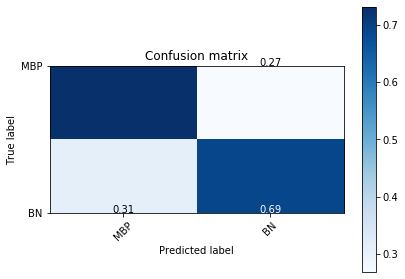

In [0]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['MBP','BN'],
                      title='Confusion matrix')

In [0]:
tn, fp, fn, tp = confusion_matrix(y_test, Predictions).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  654057
False Positives:  240552
False Negatives:  233721
True Positives:  521670


In [0]:
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:".format(Accuracy))

Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))


Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))


f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.2f}".format(f1))

Accuracy 71.26%:
Precision 0.68
Recall 0.69
F1 Score 0.69


In [0]:
Score1=DT_SA.score(x_test,y_test)

In [0]:
F_imp=pd.Series(DT_SA.feature_importances_,index=Features.columns)

In [0]:
nfolds = 10
def tn(y_true, Predictions): 
	return confusion_matrix(y_true, Predictions)[0, 0]
def fp(y_true, Predictions): 
	return confusion_matrix(y_true, Predictions)[0, 1]
def fn(y_true, Predictions): 
	return confusion_matrix(y_true, Predictions)[1, 0]
def tp(y_true, Predictions): 
	return confusion_matrix(y_true, Predictions)[1, 1]

In [0]:
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn),
           'ac' : make_scorer(accuracy_score),
           're' : make_scorer(recall_score),
           'pr' : make_scorer(precision_score),
           'f1' : make_scorer(f1_score),
           'auc' : make_scorer(roc_auc_score),
          } 

In [0]:
#cv_results = cross_validate(DT_SA, x_train, y_train, scoring=scoring, cv=StratifiedKFold(n_splits=nfolds, random_state=1))

In [0]:
print('Cross Validation scores (nfolds = %d):'% nfolds)
print('tp: ', cv_results['test_tp'], '; mean:', cv_results['test_tp'].mean())
print('fn: ', cv_results['test_fn'], '; mean:', cv_results['test_fn'].mean())
print('fp: ', cv_results['test_fp'], '; mean:', cv_results['test_fp'].mean())
print('tn: ', cv_results['test_tn'], '; mean:', cv_results['test_tn'].mean())
print('ac: ', cv_results['test_ac'], '; mean:', cv_results['test_ac'].mean())
print('re: ', cv_results['test_re'], '; mean:', cv_results['test_re'].mean())
print('pr: ', cv_results['test_pr'], '; mean:', cv_results['test_pr'].mean())
print('f1: ', cv_results['test_f1'], '; mean:', cv_results['test_f1'].mean())
print('auc: ', cv_results['test_auc'], '; mean:', cv_results['test_auc'].mean())

Cross Validation scores (nfolds = 10):
tp:  [105367 105900 105707 105724 106193 105705 105886 106400 105924 105892] ; mean: 105869.8
fn:  [47877 47344 47537 47520 47051 47539 47357 46843 47319 47351] ; mean: 47373.8
fp:  [48492 48898 48992 48725 49069 48930 49047 49097 49005 49236] ; mean: 48949.1
tn:  [133265 132859 132765 133032 132687 132826 132709 132659 132751 132520] ; mean: 132807.3
ac:  [0.7123322  0.71271131 0.71185459 0.71270235 0.71307463 0.71203284
 0.71222601 0.71361109 0.71246481 0.71167974] ; mean: 0.7124689553376695
re:  [0.68757668 0.69105479 0.68979536 0.68990629 0.69296677 0.68978231
 0.69096794 0.69432209 0.69121591 0.69100709] ; mean: 0.6908595230567166
pr:  [0.68482832 0.68411737 0.68330758 0.68452369 0.68396002 0.68357746
 0.6834309  0.68425757 0.68369382 0.68261049] ; mean: 0.6838307220502671
f1:  [0.68619974 0.68756858 0.68653614 0.68720445 0.68843394 0.68666587
 0.68717875 0.68925309 0.68743429 0.68678313] ; mean: 0.6873257989049705
auc:  [0.71039045 0.7110126

In [0]:
def evaluate_model(model, features, labels):
    pred = model.predict(features)
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('Accuracy: {} / Precision: {} / Recall: {}'.format(accuracy,precision,recall))
                                                                      
                                                                                 
                                                                                  
                                                                      

In [0]:
evaluate_model(DT_SA,x_test,y_test)

Accuracy: 0.713 / Precision: 0.684 / Recall: 0.691


In [0]:
import sklearn.metrics as metrics
probs = DT_SA.predict_proba(x_test)

In [0]:
Predicts = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, Predicts)
roc_auc = metrics.auc(fpr, tpr)

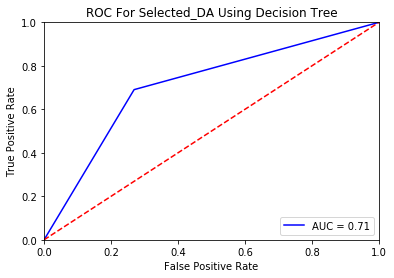

In [0]:
import matplotlib.pyplot as plt
plt.title('ROC For Selected_DA Using Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [0]:
from sklearn.ensemble import  BaggingClassifier

In [0]:
BSA_DT=BaggingClassifier(base_estimator=DT_SA, n_estimators=10, random_state=1)

In [0]:
print(BSA_DT)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=1,
                                                        splitter='best'),
       

In [0]:
BSA_DT.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=1,
                                                        splitter='best'),
       

In [0]:
Predictions_BSA_DT=BSA_DT.predict(x_test)

In [0]:
Predictions_BSA_DT

array([0., 0., 1., ..., 0., 1., 1.])

In [0]:
cnf_matrix = confusion_matrix(y_test, Predictions)

Normalized confusion matrix
[[0.86863758 0.13136242]
 [0.32378861 0.67621139]]


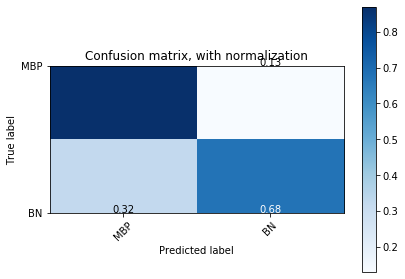

In [0]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['MBP','BN'],
                      title='Confusion matrix, with normalization')

In [0]:
tn, fp, fn, tp = confusion_matrix(y_test, Predictions).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  777091
False Positives:  117518
False Negatives:  244587
True Positives:  510804


In [0]:
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:".format(Accuracy))

Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.2f}".format(f1))

Accuracy 78.05%:
Precision 0.81
Recall 0.68
F1 Score 0.74


In [0]:
Score2=BSA_DT.score(x_test,y_test)

In [0]:
nfolds = 10
def tn(y_true, Predictions): 
	return confusion_matrix(y_true, Predictions)[0, 0]
def fp(y_true, Predictions): 
	return confusion_matrix(y_true, Predictions)[0, 1]
def fn(y_true, Predictions): 
	return confusion_matrix(y_true, Predictions)[1, 0]
def tp(y_true, Predictions): 
	return confusion_matrix(y_true, Predictions)[1, 1]

In [0]:
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn),
           'ac' : make_scorer(accuracy_score),
           're' : make_scorer(recall_score),
           'pr' : make_scorer(precision_score),
           'f1' : make_scorer(f1_score),
           'auc' : make_scorer(roc_auc_score),
          } 

In [0]:
import sklearn.metrics as metrics
probs = BSA_DT.predict_proba(x_test)

In [0]:
Predicts = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, Predictions)
roc_auc = metrics.auc(fpr, tpr)

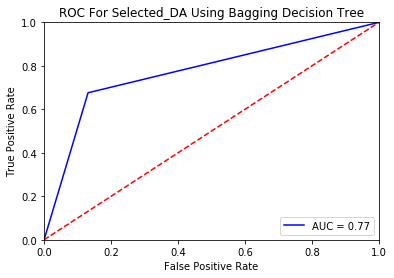

In [0]:
import matplotlib.pyplot as plt
plt.title('ROC For Selected_DA Using Bagging Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [0]:
cv_results = cross_validate(BSA_DT, x_train, y_train, scoring=scoring, cv=StratifiedKFold(n_splits=nfolds, random_state=1))

In [0]:
print('Cross Validation scores (nfolds = %d):'% nfolds)
print('tp: ', cv_results['test_tp'], '; mean:', cv_results['test_tp'].mean())
print('fn: ', cv_results['test_fn'], '; mean:', cv_results['test_fn'].mean())
print('fp: ', cv_results['test_fp'], '; mean:', cv_results['test_fp'].mean())
print('tn: ', cv_results['test_tn'], '; mean:', cv_results['test_tn'].mean())
print('ac: ', cv_results['test_ac'], '; mean:', cv_results['test_ac'].mean())
print('re: ', cv_results['test_re'], '; mean:', cv_results['test_re'].mean())
print('pr: ', cv_results['test_pr'], '; mean:', cv_results['test_pr'].mean())
print('f1: ', cv_results['test_f1'], '; mean:', cv_results['test_f1'].mean())
print('auc: ', cv_results['test_auc'], '; mean:', cv_results['test_auc'].mean())

Cross Validation scores (nfolds = 10):
tp:  [103304 103638 103564 103385 103835 103420 103499 104012 103833 103660] ; mean: 103615.0
fn:  [49940 49606 49680 49859 49409 49824 49744 49231 49410 49583] ; mean: 49628.6
fp:  [23793 24269 24205 24095 23881 24032 24046 24115 24080 24267] ; mean: 24078.3
tn:  [157964 157488 157552 157662 157875 157724 157710 157641 157676 157489] ; mean: 157678.1
ac:  [0.77990215 0.77947827 0.77944842 0.77924245 0.78122388 0.77953433
 0.77973069 0.78105606 0.78062621 0.77955158] ; mean: 0.7799794038487315
re:  [0.67411448 0.67629401 0.67581112 0.67464305 0.67757955 0.67487145
 0.67539137 0.678739   0.67757092 0.67644199] ; mean: 0.6761456945415649
pr:  [0.81279653 0.81026058 0.81055655 0.81098996 0.81301481 0.81144274
 0.81147046 0.8117883  0.81174705 0.81030588] ; mean: 0.8114372858862389
f1:  [0.73698817 0.73724084 0.73707622 0.73655975 0.73914436 0.73688261
 0.73720387 0.73932544 0.73861486 0.73734751] ; mean: 0.7376383637842996
auc:  [0.77160447 0.7713847

**Hypothesis Testing**

In [0]:
print('Decision Tree accuracy: %.2f%%' % (Score1*100))
print('Bagging Decision tree accuracy: %.2f%%' % (Score2*100))

Decision Tree accuracy: 71.26%
Bagging Decision tree accuracy: 78.05%


In [0]:
from mlxtend.evaluate import paired_ttest_kfold_cv,paired_ttest_5x2cv

In [0]:
t,p=paired_ttest_5x2cv(estimator1=DT_SA,estimator2=BSA_DT,X=Features,y=Labels)